Data visualization

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df_train = pd.read_csv("C:/Users/guoyy/OneDrive/Desktop/ADEC 7630 Algorithm Intelligence/Final/train.csv", index_col='id')

In [52]:
TARGET = 'Attrition'
print('Train:', len(df_train))
print(df_train[TARGET].value_counts())
print()

Train: 1677
0    1477
1     200
Name: Attrition, dtype: int64



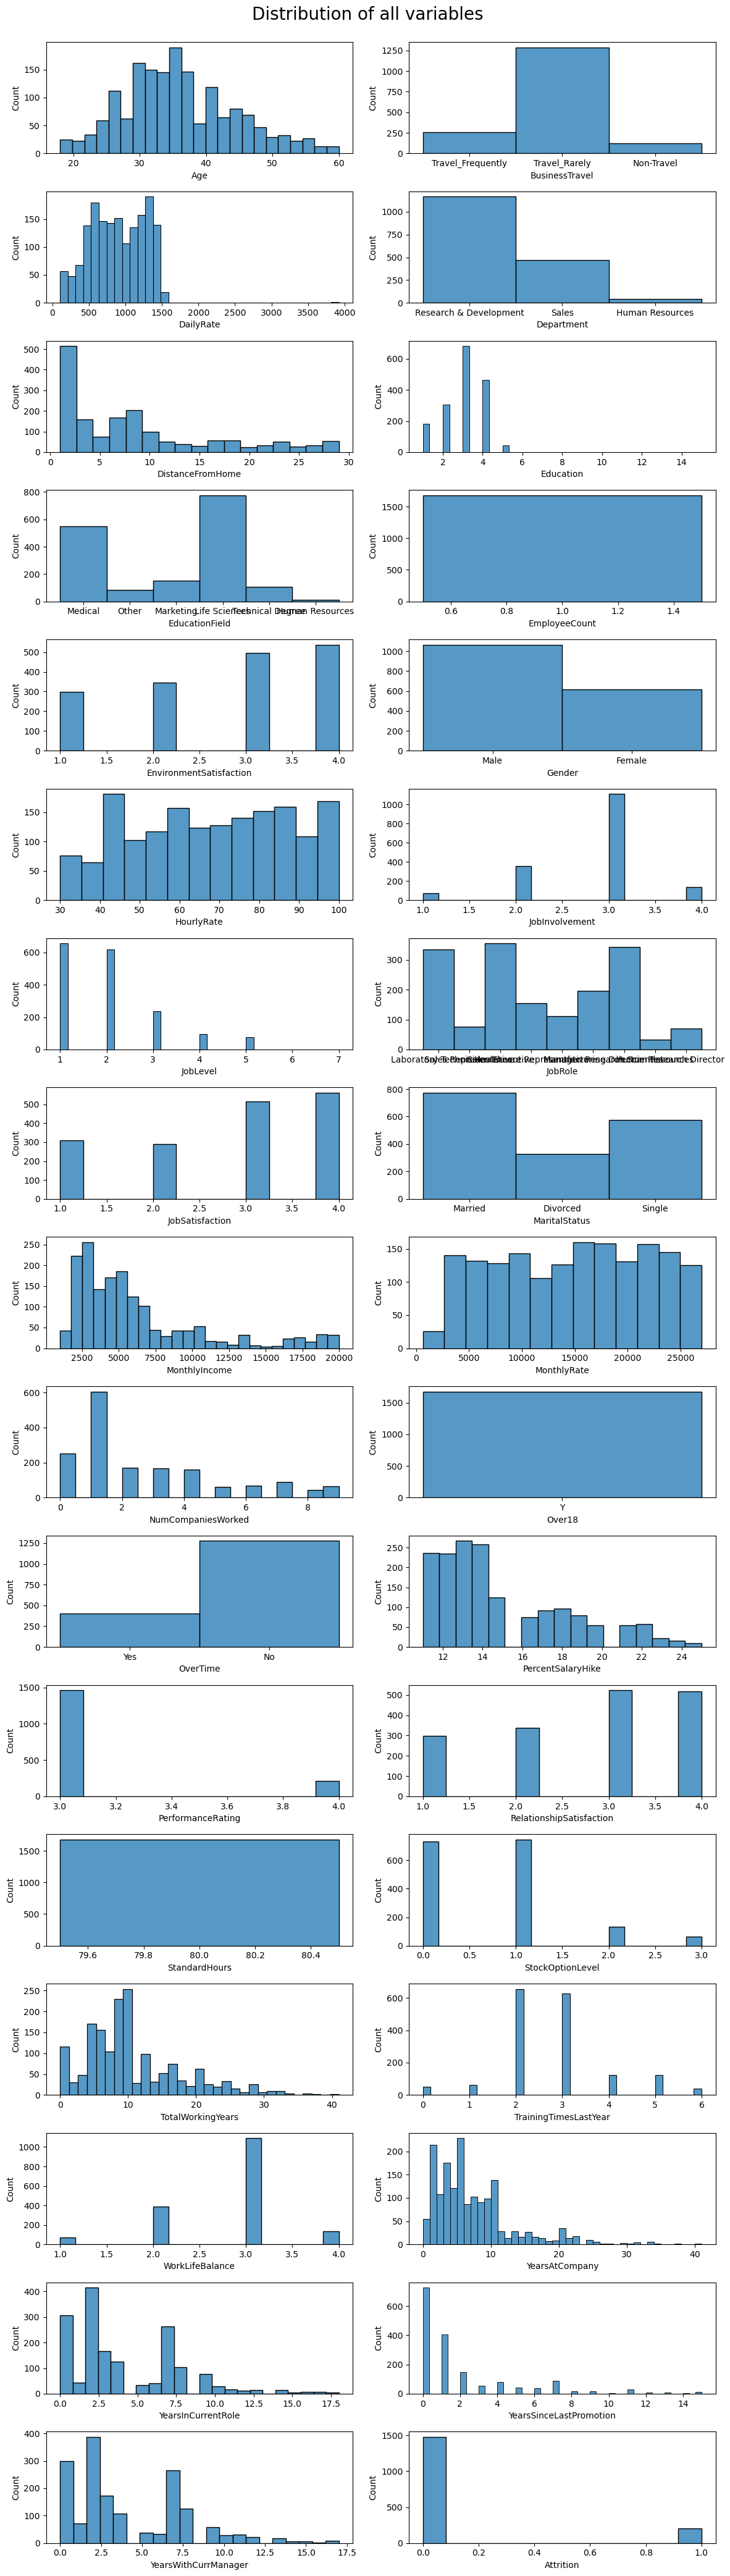

In [53]:
ncols = 2
nrows = np.ceil(len(df_train.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(df_train.columns, axs.flatten()):
    sns.histplot(df_train, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [54]:
#Those plot shows the distribution of each category

In [55]:
df_train.drop(columns=['Over18', 'EmployeeCount', 'StandardHours','id'], inplace=True, errors='ignore')
TARGET_CAT = 'Attrition_cat'
df_train[TARGET_CAT] = df_train[TARGET].astype('category')
df_train['source'] = 'train'
NUM_FEATURES = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

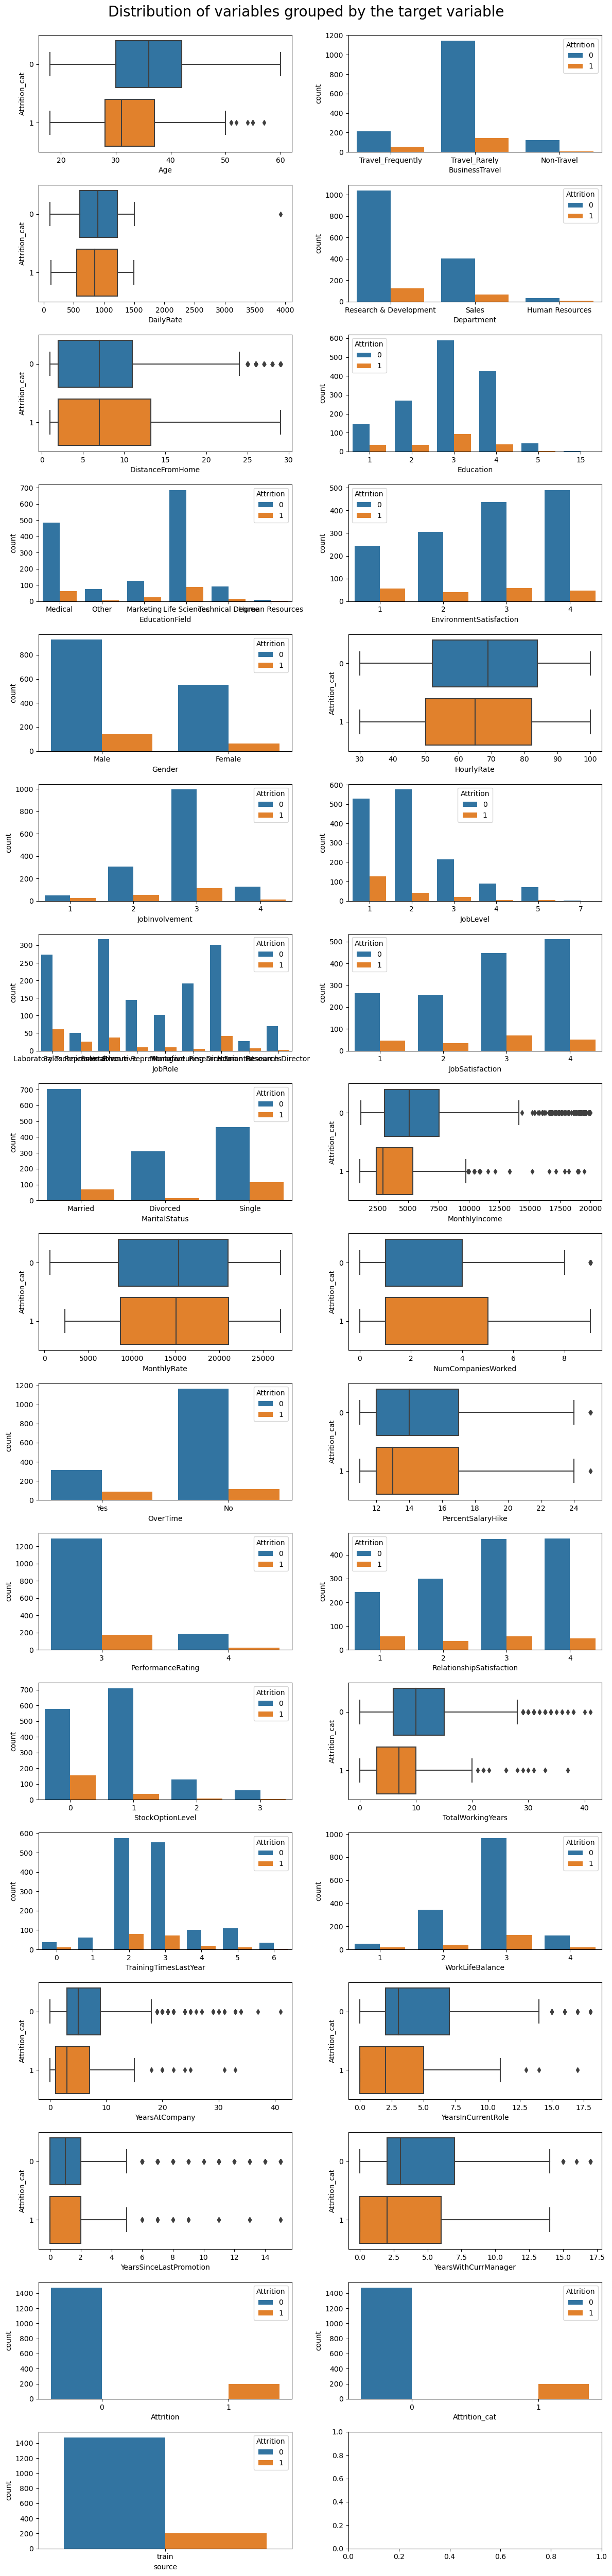

In [56]:
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*3))
for c, ax in zip(df_train.columns, axs.flatten()):
    if c in NUM_FEATURES:
        sns.boxplot(data=df_train, x=c, y=TARGET_CAT, ax=ax)
    else:
        sns.countplot(data=df_train, x=c, hue=TARGET, ax=ax)
fig.suptitle('Distribution of variables grouped by the target variable', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [57]:
#For numerical variables, showing the boxplot,
#For category variables, showing the countplot

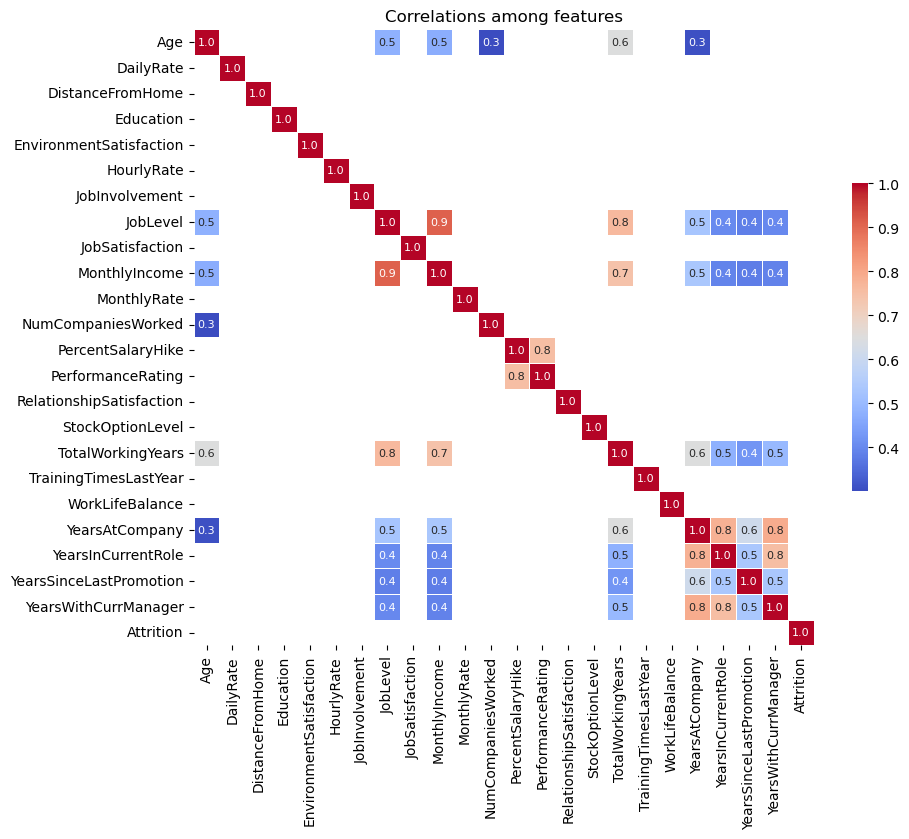

In [58]:
# Explore the correlation between all numerical features
corr = df_train.corr()

# Keep only correlation higher than a threshold
threshold = 0.3
corr_threshold = corr[(corr > threshold) | (corr < -threshold)]

#Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_threshold, annot=True, cmap='coolwarm', fmt=".1f",
            linewidths=.5, cbar_kws={'shrink': .5},annot_kws={'size': 8})
plt.title("Correlations among features")
plt.show()

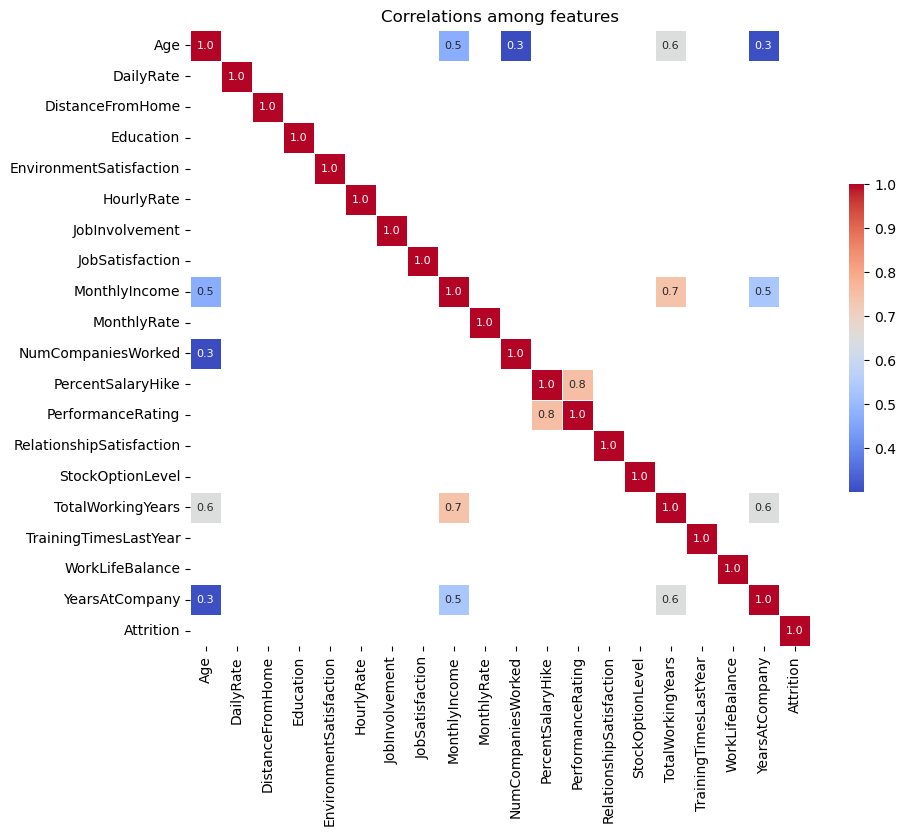

In [66]:
a = df_train.drop(columns=['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',"JobLevel"])
corr = a.corr()

# Keep only correlation higher than a threshold
threshold = 0.3
corr_threshold = corr[(corr > threshold) | (corr < -threshold)]

#Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_threshold, annot=True, cmap='coolwarm', fmt=".1f",
            linewidths=.5, cbar_kws={'shrink': .5},annot_kws={'size': 8})
plt.title("Correlations among features")
plt.show()

In [67]:
#After dropping some variables, the correlation map looks good